# BP_Data 데이터 분석(EDA) 및 분류

## import Libraries

In [18]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Data Import

In [21]:
# 데이터셋 인스턴스 생성
data = pd.read_csv("https://github.com/MyungKyuYi/AI-class/raw/main/BP_data.csv")  # CSV 파일 웹 경로
print(data.head)
print("\n=====================================================\n")

<bound method NDFrame.head of       Patient_Number  Blood_Pressure_Abnormality  Level_of_Hemoglobin  \
0                  1                           1                11.28   
1                  2                           0                 9.75   
2                  3                           1                10.79   
3                  4                           0                11.00   
4                  5                           1                14.17   
...              ...                         ...                  ...   
1995            1996                           1                10.14   
1996            1997                           1                11.77   
1997            1998                           1                16.91   
1998            1999                           0                11.15   
1999            2000                           1                11.36   

      Genetic_Pedigree_Coefficient  Age  BMI  Sex  Pregnancy  Smoking  \
0                   

Patient_Number - 환자 번호 (고유 식별자)

Blood_Pressure_Abnormality - 혈압 이상 여부

Level_of_Hemoglobin - 헤모글로빈 수치

Genetic_Pedigree_Coefficient - 유전 계수 (가족력 영향 지수)

Age - 나이

BMI - 체질량지수

Sex - 성별

Pregnancy - 임신 여부

Smoking - 흡연 여부

Physical_activity - 신체 활동 수준

salt_content_in_the_diet - 식단의 염분 함량

alcohol_consumption_per_day - 일일 알코올 섭취량

Level_of_Stress - 스트레스 수준

Chronic_kidney_disease - 만성 신장 질환 여부

Adrenal_and_thyroid_disorders - 부신 및 갑상선 장애 여부

## 결측치 처리

In [25]:
# 결측치 확인
print(data.isnull().sum())
print("\n=====================================================\n")

# 결측치 처리
data['Genetic_Pedigree_Coefficient'] = data['Genetic_Pedigree_Coefficient'].fillna(data['Genetic_Pedigree_Coefficient'].mean()) # 결측치를 평균으로 채움
data['alcohol_consumption_per_day'] = data['alcohol_consumption_per_day'].fillna(data['Genetic_Pedigree_Coefficient'].mean()) # 결측치를 평균으로 채움
data['Pregnancy'] = data['Pregnancy'].fillna(0) # 결측치를 0(임신 안함)으로 채움

# 결측치 확인
print(data.isnull().sum())
print("\n=====================================================\n")

# 레이블 불균형 여부를 위한 갯수 확인 (숫자)
print(data['Blood_Pressure_Abnormality'].value_counts())
print("\n=====================================================\n")

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64


Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day   

## EDA(Exploratory Data Analysis, 탐색적 데이터 분석)

- countplot :  범주형 컬럼(클래스, 레이블 등)의 각 범주별 데이터 개수를 막대그래프로 시각화한다.

- boxplot
    - 컬럼의 값의 범위(최소값, 최대값, 사분위수, 이상치) 를 시각화한다.
    - 박스는 Q1(1사분위수) ~ Q3(3사분위수) 구간(= 전체 데이터의 50%)을 나타낸다.
                                   
- violinplot
    - boxplot + 밀도곡선을 결합한 형태.
    - 값의 분포 모양과 사분위수를 함께 시각화한다.
    - 분포가 비대칭인지, 여러 피크가 있는지도 파악할 수 있다.
                                   
- heatmap
    - 컬럼 간의 상관관계 또는 값의 크기를 색깔로 시각화한다.
    - 특히 상관계수(correlation matrix)를 시각화할 때 많이 쓴다.

- 히스토그램(histplot) : 컬럼의 값 분포를 구간(bin)으로 나누어 빈도수를 시각화한다.

- kdeplot
    - 히스토그램을 부드럽게 연결한 확률 밀도 함수(PDF)**를 그린 것.
    - 값이 어디에 밀집되어 있는지 매끄럽게 보여준다.

- displot
    - histplot + kdeplot을 결합할 수 있는 함수.
    - 히스토그램과 커널 밀도 추정(kde)을 함께 보여줄 수 있다.
    - 단독으로는 histplot처럼 동작하기도 한다.

- lineplot
    - 연속적인 데이터의 추세를 선으로 시각화한다.
    - 시간 시계열 데이터(time series) 분석에도 많이 사용된다.

- 산점도(scatterplot)
    - 두 변수 간의 관계나 분포를 점으로 표현한다.
    - 패턴, 클러스터링, 이상치(outlier)를 찾기에 좋다.

- barplot
    - 범주형 변수에 대해 평균(mean), 중앙값(median) 등을 막대그래프로 보여준다.
    - 단순 countplot과 달리, 값의 통계량(aggregated value)을 보여주는 게 차이점이다.

## countplot

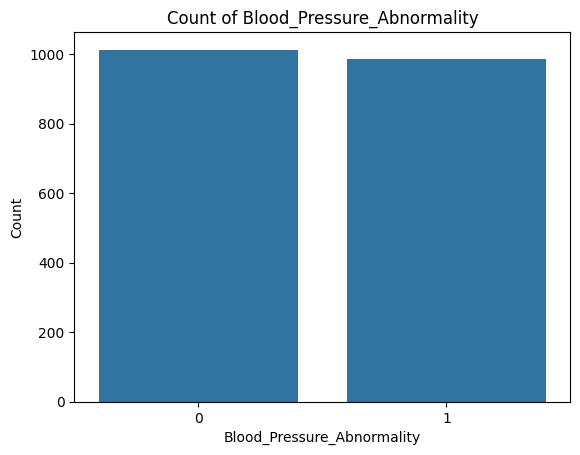

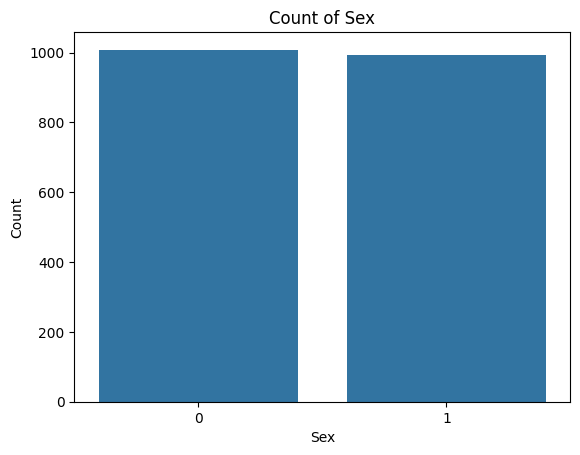

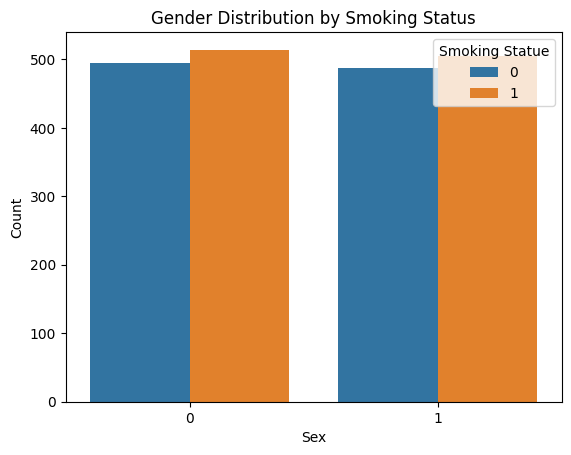

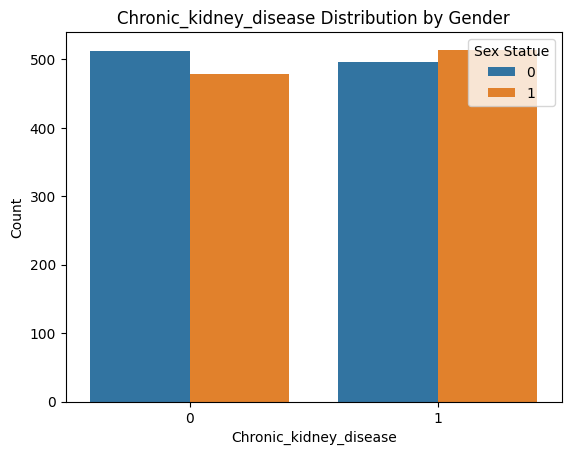

In [31]:
# 혈압 이상 여부(Blood_Pressure_Abnormality) 범주별 데이터 개수 시각화 (countplot)
sns.countplot(x='Blood_Pressure_Abnormality', data=data)
plt.title('Count of Blood_Pressure_Abnormality')
plt.xlabel('Blood_Pressure_Abnormality')
plt.ylabel('Count')
plt.show()

# 성별(Sex) 범주별 데이터 개수 시각화 (countplot)
sns.countplot(x='Sex', data=data)
plt.title('Count of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# 흡연 여부(Smoking)에 따른 성별(Sex) 분포를 시각화 (countplot)
sns.countplot(x='Sex', hue='Smoking', data=data)
plt.title('Gender Distribution by Smoking Status')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Smoking Statue')  # 범례 제목 설정
plt.show()

# 성별(Sex)에 따른 만성 질환 여부(Chronic_kidney_disease) 빈도수 시각화 (countplot)
sns.countplot(x='Chronic_kidney_disease', hue='Sex', data=data)
plt.title('Chronic_kidney_disease Distribution by Gender')
plt.xlabel('Chronic_kidney_disease')
plt.ylabel('Count')
plt.legend(title='Sex Statue')  # 범례 제목 설정
plt.show()

## boxplot

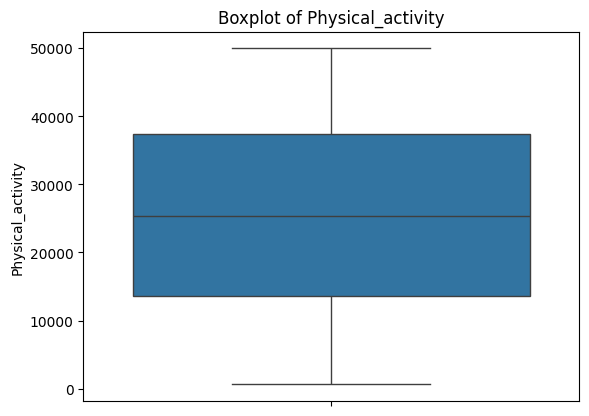

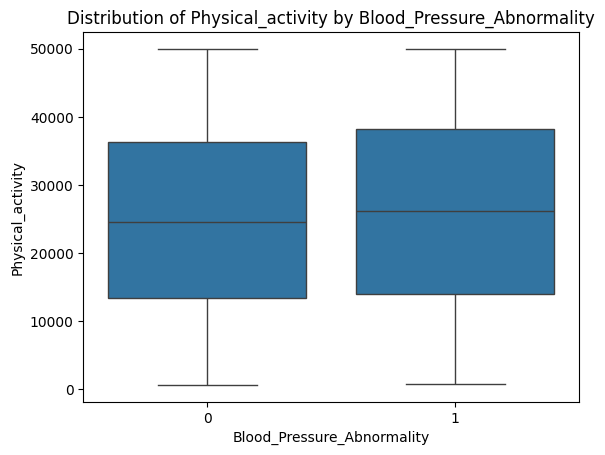

In [34]:
# 신체 활동 수준(Physical_activity) 컬럼의 값의 범위를 시각화 (boxplot)
sns.boxplot(y=data['Physical_activity'])  # 수직 boxplot
plt.title('Boxplot of Physical_activity')
plt.ylabel('Physical_activity')
plt.show()

# 혈압 이상 여부(Blood_Pressure_Abnormality)에 따라 신체 활동 수준(Physical_activity) 값의 분포를 시각화 (boxplot)
sns.boxplot(x='Blood_Pressure_Abnormality', y='Physical_activity', data=data)
plt.title('Distribution of Physical_activity by Blood_Pressure_Abnormality')
plt.xlabel('Blood_Pressure_Abnormality')
plt.ylabel('Physical_activity')
plt.show()

## violinplot

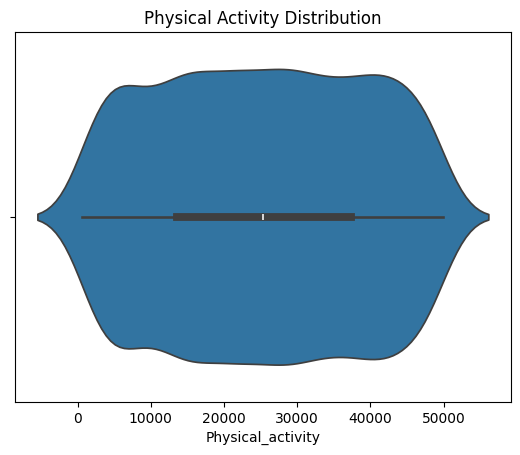

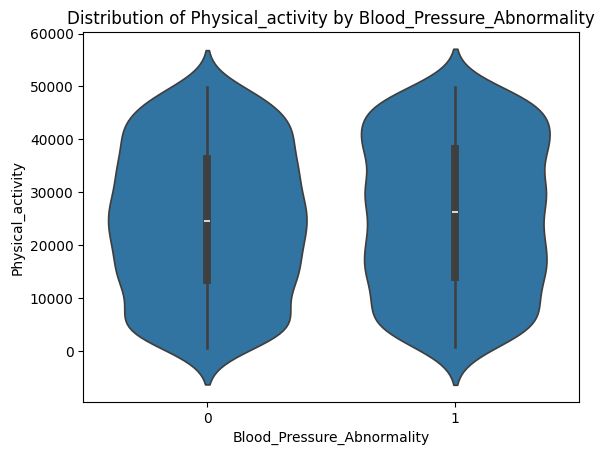

In [37]:
# 신체 활동 수준(Physical_activity) 값의 분포 밀도를 시각화 (violinplot)
sns.violinplot(x='Physical_activity', data=data)
plt.title('Physical Activity Distribution')
plt.xlabel('Physical_activity')
plt.show()

# 혈압 이상 여부(Blood_Pressure_Abnormality)에 따른 신체 활동 수준(Physical_activity) 값의 분포 밀도를 시각화 (violinplot)
sns.violinplot(x='Blood_Pressure_Abnormality', y='Physical_activity', data=data)
plt.title('Distribution of Physical_activity by Blood_Pressure_Abnormality')
plt.xlabel('Blood_Pressure_Abnormality')
plt.ylabel('Physical_activity')
plt.show()

## heatmap

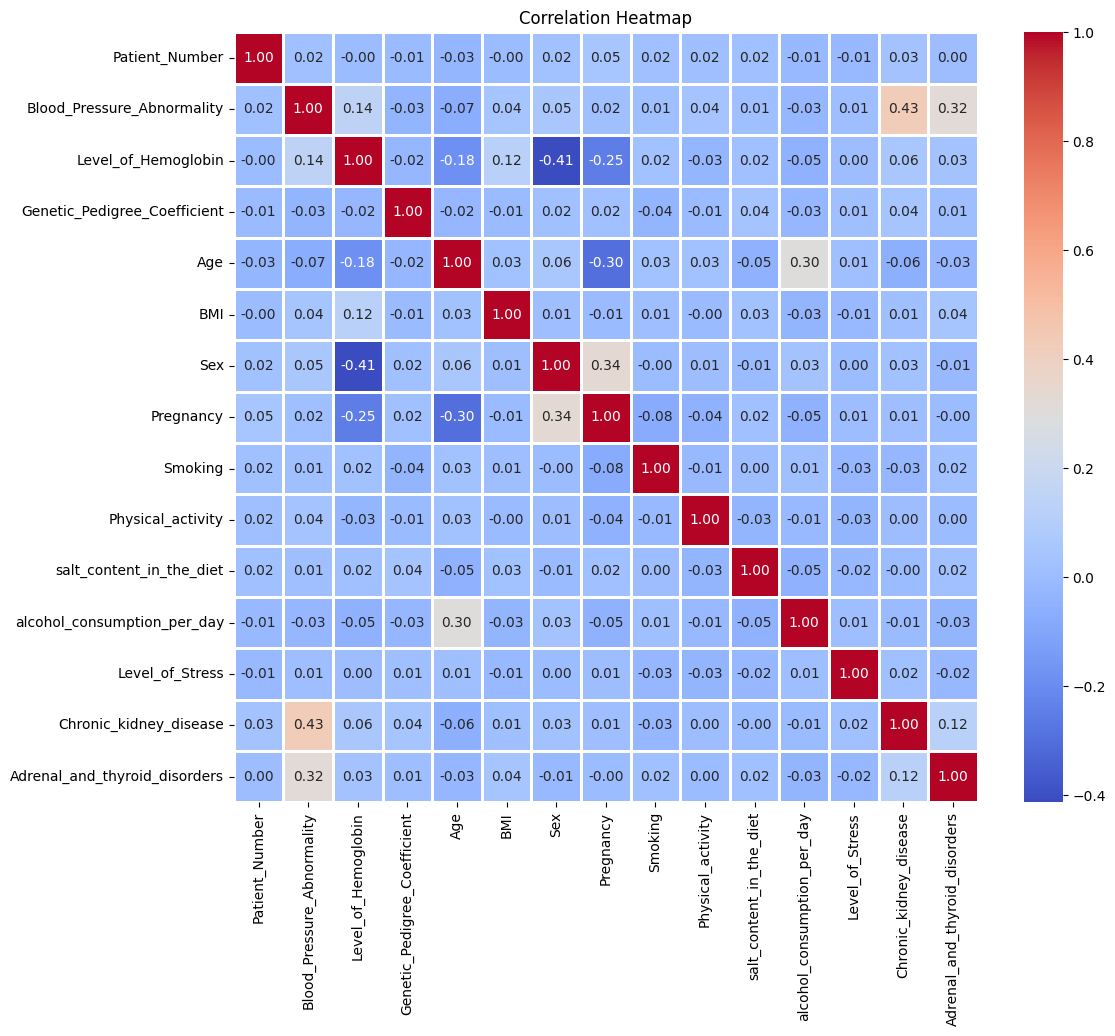

In [40]:
# 상관관계 행렬 계산
corr = data.corr()
plt.figure(figsize=(12, 10))  # 너비 12, 높이 10으로 그림 크기 키움
# Heatmap 그리기
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

## histplot

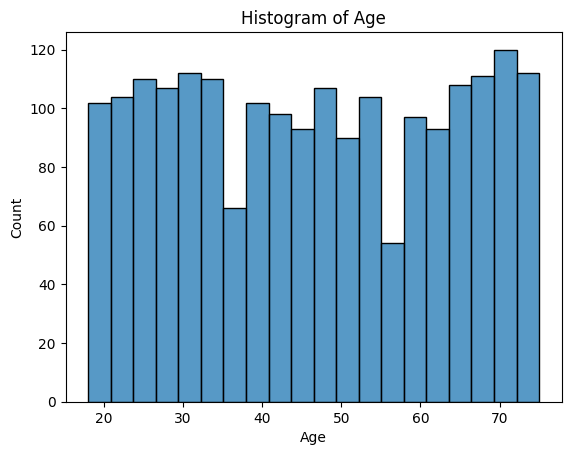

In [43]:
# 나이(Age) 컬럼의 히스토그램 (histplot)
sns.histplot(data['Age'], bins=20, kde=False)  # kde=True 하면 밀도 곡선도 추가됨
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## lineplot

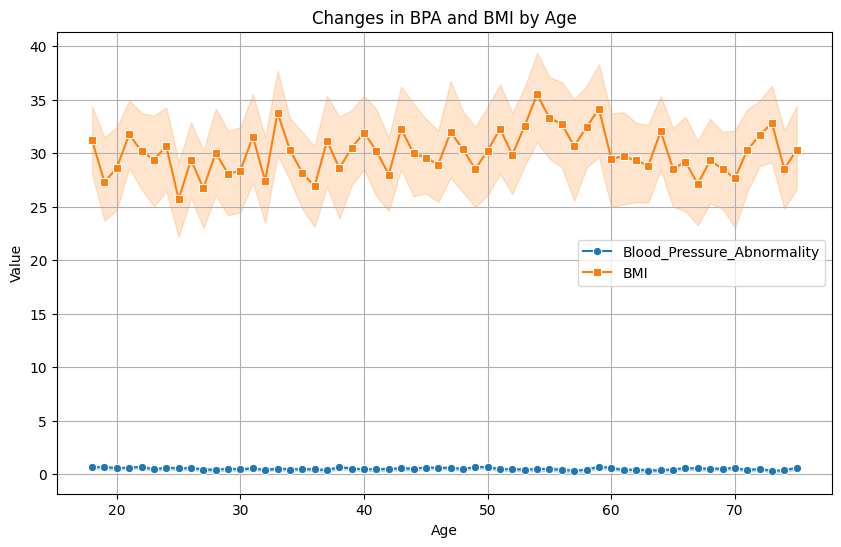

In [46]:
# 나이에 따른 혈압 이상 여부(Blood_Pressure_Abnormality) 변화 (lineplot)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Blood_Pressure_Abnormality', data=data, label='Blood_Pressure_Abnormality', marker='o')
# 나이에 따른 BMI 변화 (lineplot)
sns.lineplot(x='Age', y='BMI', data=data, label='BMI', marker='s')
plt.title('Changes in BPA and BMI by Age')
plt.xlabel('Age')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## scatterplot

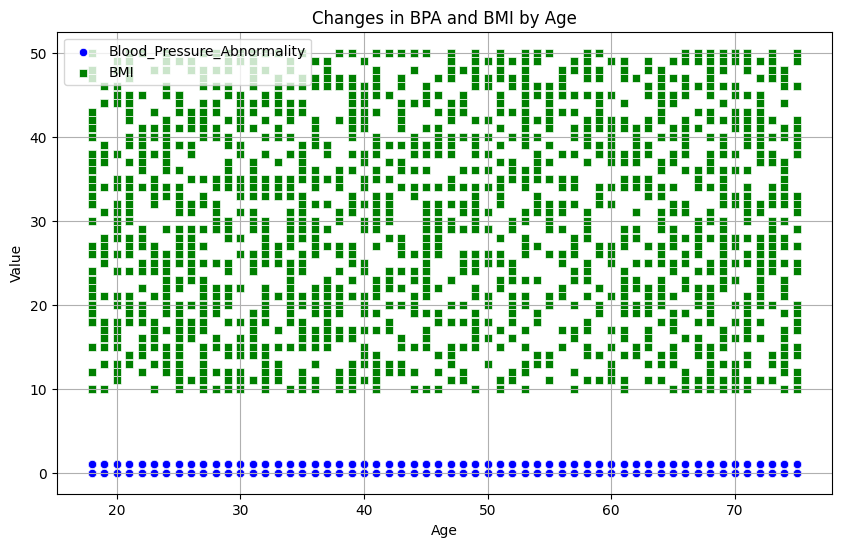

In [49]:
# 나이에 따른 BPA 변화 (산점도, scatterplot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Blood_Pressure_Abnormality', data=data, label='Blood_Pressure_Abnormality', color='blue', marker='o')
# 나이에 따른 BMI 변화 (산점도, scatterplot)
sns.scatterplot(x='Age', y='BMI', data=data, label='BMI', color='green', marker='s')
plt.title('Changes in BPA and BMI by Age')
plt.xlabel('Age')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## kdeplot

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8548\4240624231.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Blood Pressure Abnormality')


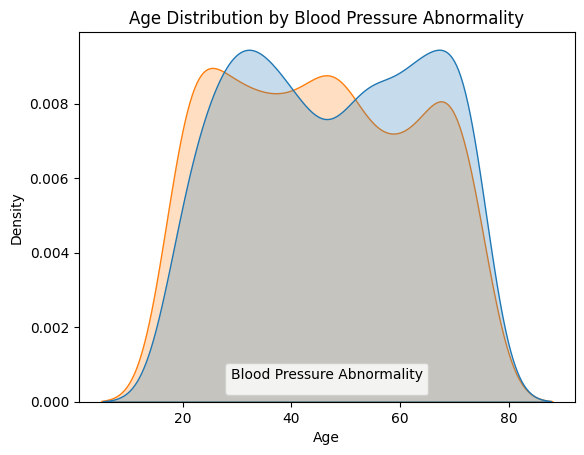

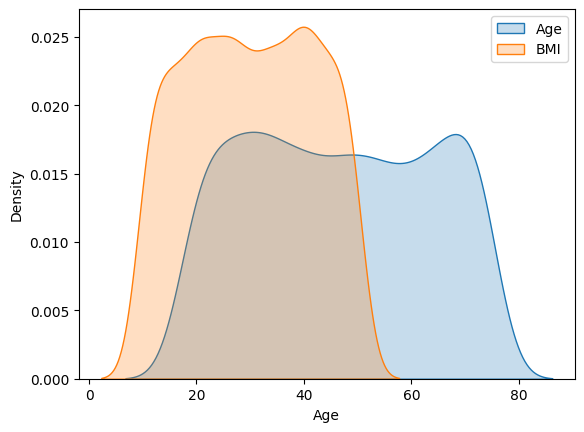

In [54]:
# 협압 이상 여부에 따른 나이 밀도 곡선 (kdeplot)
sns.kdeplot(x='Age', data=data, hue='Blood_Pressure_Abnormality', fill=True)
plt.title('Age Distribution by Blood Pressure Abnormality')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Blood Pressure Abnormality')
plt.show()

# BMI, 나이 밀도 그래프 (kdeplot)
sns.kdeplot(data['Age'], ax = plt.gca(), label = 'Age', fill = True)
sns.kdeplot(data['BMI'], ax = plt.gca(), label = 'BMI', fill = True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

## displot

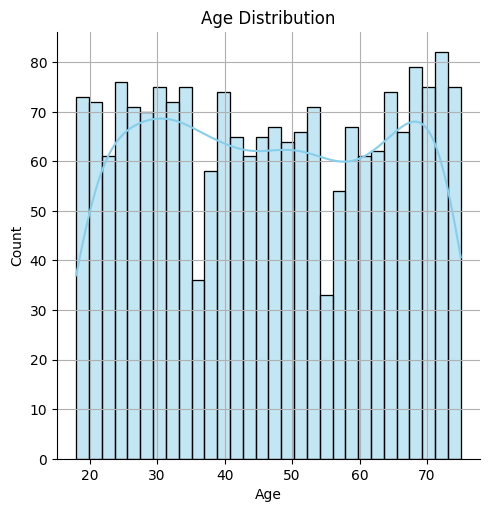

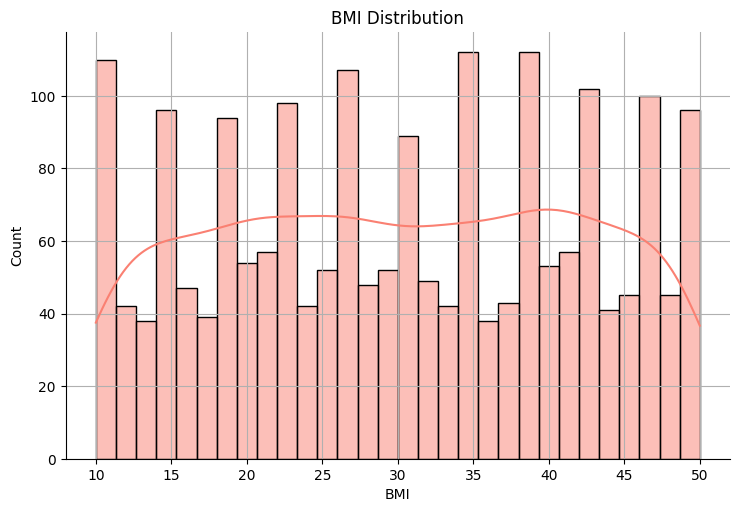

In [61]:
# 나이 분포 시각화 (displot)
sns.displot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# BMI 분포 시각화 (displot)
sns.displot(data['BMI'], kde=True, bins=30, color='salmon', aspect=1.5)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## 데이터 전처리

In [64]:
X = data.drop(['Blood_Pressure_Abnormality'], axis=1) # Feature
Y = data['Blood_Pressure_Abnormality'] # Label

# Numpy 변환
X = X.values 
Y = Y.values
print(X)
print(Y)

# 데이터 표준화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습 데이터 & 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=15)

# 분할된 데이터의 shape을 출력
print("\n=====================================================\n")
print("X_train.shape : ", X_train.shape) # (537, 8) : 특성의 개수 8개
print("X_test.shape : ", X_test.shape)
print("Y_train.shape : ", Y_train.shape)
print("Y_test.shape : ", Y_test.shape) 


# numpy 배열 --> torch tensor으로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32).view(-1, 1) # view(-1, 1) : (행, 1) 형태로 변환. 모델이 기대하는 입력 형태는 2차원 배열이기 때문이다.
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32).view(-1, 1)

# torch tensor 데이터의 shape을 출력
print("\n=====================================================\n")
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("Y_train.shape : ", Y_train.shape)
print("Y_test.shape : ", Y_test.shape)

[[1.000e+00 1.128e+01 9.000e-01 ... 2.000e+00 1.000e+00 1.000e+00]
 [2.000e+00 9.750e+00 2.300e-01 ... 3.000e+00 0.000e+00 0.000e+00]
 [3.000e+00 1.079e+01 9.100e-01 ... 2.000e+00 1.000e+00 0.000e+00]
 ...
 [1.998e+03 1.691e+01 2.200e-01 ... 2.000e+00 1.000e+00 1.000e+00]
 [1.999e+03 1.115e+01 7.200e-01 ... 3.000e+00 0.000e+00 1.000e+00]
 [2.000e+03 1.136e+01 9.000e-02 ... 1.000e+00 1.000e+00 0.000e+00]]
[1 0 1 ... 1 0 1]


X_train.shape :  (1400, 14)
X_test.shape :  (600, 14)
Y_train.shape :  (1400,)
Y_test.shape :  (600,)


X_train.shape :  torch.Size([1400, 14])
X_test.shape :  torch.Size([600, 14])
Y_train.shape :  torch.Size([1400, 1])
Y_test.shape :  torch.Size([600, 1])


## Classification

Epoch 1/25, Loss: 0.6783, Accuracy: 68.33%
Epoch 2/25, Loss: 0.6000, Accuracy: 73.17%
Epoch 3/25, Loss: 0.5179, Accuracy: 73.17%
Epoch 4/25, Loss: 0.4937, Accuracy: 76.17%
Epoch 5/25, Loss: 0.4644, Accuracy: 77.67%
Epoch 6/25, Loss: 0.4292, Accuracy: 80.17%
Epoch 7/25, Loss: 0.3929, Accuracy: 81.33%
Epoch 8/25, Loss: 0.3492, Accuracy: 83.17%
Epoch 9/25, Loss: 0.3168, Accuracy: 84.17%
Epoch 10/25, Loss: 0.2926, Accuracy: 84.17%
Epoch 11/25, Loss: 0.2719, Accuracy: 82.83%
Epoch 12/25, Loss: 0.2598, Accuracy: 85.17%
Epoch 13/25, Loss: 0.2498, Accuracy: 85.50%
Epoch 14/25, Loss: 0.2374, Accuracy: 85.33%
Epoch 15/25, Loss: 0.2320, Accuracy: 84.50%
Epoch 16/25, Loss: 0.2250, Accuracy: 86.33%
Epoch 17/25, Loss: 0.2204, Accuracy: 86.17%
Epoch 18/25, Loss: 0.2121, Accuracy: 85.83%
Epoch 19/25, Loss: 0.2093, Accuracy: 85.17%
Epoch 20/25, Loss: 0.1990, Accuracy: 84.67%
Epoch 21/25, Loss: 0.1905, Accuracy: 85.50%
Epoch 22/25, Loss: 0.1930, Accuracy: 86.17%
Epoch 23/25, Loss: 0.1830, Accuracy: 85.1

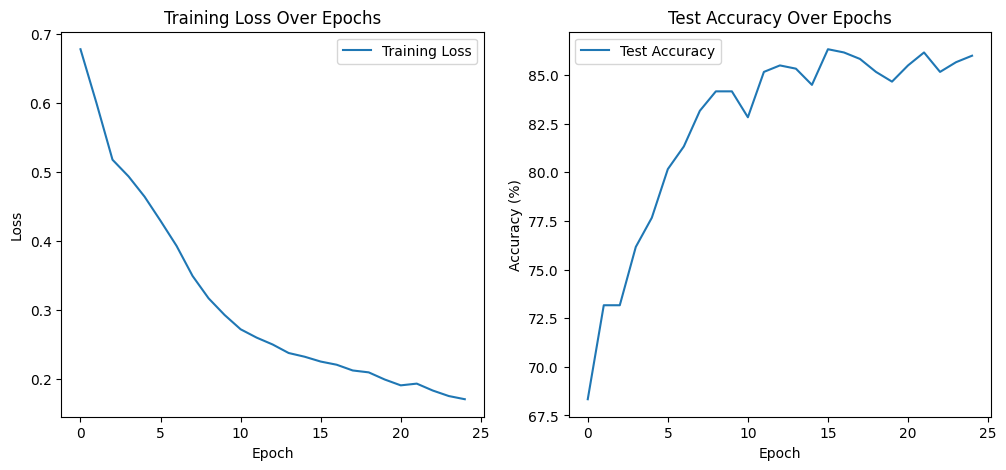

In [67]:
# PyTorch DataLoader로 감싸서 미니배치 학습 가능하게 함
train_dataset = TensorDataset(X_train, Y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True) # batch size를 32으로 설정
test_dataset = TensorDataset(X_test, Y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class BP_Dense(nn.Module):
    def __init__(self):
        super(BP_Dense, self).__init__()
        self.fc1 = nn.Linear(14, 64) # 입력층 : 특성의 개수 8개
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)  # 출력층 : 이진분류의 출력 뉴런 수는 1
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x)) # 이진 분류에서 출력층의 활성화 함수는 sigmoid. 만약 BCEWithLogitLoss()를 loss function으로 쓰면 sigmoid 지정 안해도 됨.
        return x

# Initialize the model, loss function, and optimizer
model = BP_Dense() # 모델 생성
criterion = nn.BCELoss() # 손실 함수. 이진분류이므로 BCELoss() 사용.
optimizer = optim.Adam(model.parameters(), lr=0.001) # 옵티마이저는 Adam을 사용


# Variables to store loss and accuracy
train_losses = [] # 각 epoch마다 평균 loss를 저장할 리스트
test_accuracies = [] # 각 epoch마다 accuracy를 저장할 리스트

# Training loop
num_epochs = 25
for epoch in range(num_epochs): # epoch(30) 동안 훈련
    model.train() # 학습 모드
    running_loss = 0.0 # 해당 epoch의 loss의 초기값을 0으로 설정
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs) # inputs(특성들)을 모델에 입력하여 예측. outputs : 모델의 예측값(분류이므로 각 클래스에 대한 확률값)
        loss = criterion(outputs, labels) # 예측값과 실제 label값들을 매치시켜 loss를 계산.

        # Backward pass and optimize
        loss.backward() # 역방향 전파. 가중치와 편향을 조정하는 과정
        optimizer.step()

        running_loss += loss.item() # 해당 epoch의 총 loss값

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader)) # epoch마다 평균 loss값을 저장. 한 epoch에서 나온 총 loss를 배치(batch) 수로 나눠서 평균을 구해 기록하는 줄.

    # Evaluate on test data
    model.eval() # 평가 모드
    correct = 0 # 예측 성공 수
    total = 0 # 샘플 수
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs) # 예측
            predicted = (outputs >= 0.5).float()  # 0.5 기준으로 0, 1 분류
            total += labels.size(0) # 전체 샘플 수 누적
            correct += (predicted == labels).sum().item() # 예측이 맞았으면, 예측 성공 수 증가

    accuracy = 100 * correct / total # accuracy : 맞춘 샘플 수 / 전체 샘플 수
    test_accuracies.append(accuracy) # epoch마다 정확도 값을 저장

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%") # epoch마다 평균 loss와 정확도를 출력

print("Training complete.")


# Evaluation
model.eval() # 평가 모드
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs) # 예측
        predicted = (outputs >= 0.5).float()  # 0.5 기준으로 0, 1 분류
        all_labels.extend(labels.cpu().numpy()) # all_labels 리스트에 실제 값을 저장
        all_predictions.extend(predicted.cpu().numpy()) # all_predictions 리스트에 예측 값을 저장

# numpy 배열로 변환
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# 실제 값과 예측 값을 매치하여 혼동 행렬, f1-score, precision, recall을 계산.
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# 각 클래스에 대한 특이도(specificity) 계산
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

# 위에서 계산한 평가 지표들을 출력.
print("\n=====================================================\n")
print(f'Confusion Matrix:\n{conf_matrix}')
print("\n=====================================================\n")
print(f'F1 Score: {f1:.2f}')
print("\n=====================================================\n")
print(f'Precision: {precision:.2f}')
print("\n=====================================================\n")
print(f'Recall: {recall:.2f}')
print("\n=====================================================\n")
print(f'Specificity: {np.mean(specificity):.2f}')
print("\n=====================================================\n")


# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# 학습이 진행됨에 따라 변화하는 loss 값을 시각화
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# 학습이 진행됨에 따라 변화하는 accuracy 값을 시각화
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()